<a href="https://colab.research.google.com/github/Danila939/project/blob/main/lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = pd.read_csv('/content/sample_data/breast-cancer-wisconsin.data',
                 sep=',',
                 header=None,
                 names=['Id', 
                        'ClumpThickness',
                        'UniformityOfCellSize',
                        'UniformityOfCellShape',
                        'MarginalAdhesion',
                        'SingleEpithelialCellSize',
                        'BareNuclei',
                        'BlandChromatin',
                        'NormanNucleoli',
                        'Mitoses',
                        'Class'])
X.head()

,Id,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormanNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        699 non-null    int64 
 1   ClumpThickness            699 non-null    int64 
 2   UniformityOfCellSize      699 non-null    int64 
 3   UniformityOfCellShape     699 non-null    int64 
 4   MarginalAdhesion          699 non-null    int64 
 5   SingleEpithelialCellSize  699 non-null    int64 
 6   BareNuclei                699 non-null    object
 7   BlandChromatin            699 non-null    int64 
 8   NormanNucleoli            699 non-null    int64 
 9   Mitoses                   699 non-null    int64 
 10  Class                     699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
X.drop(X[X['BareNuclei'] == '?'].index, inplace=True)
X['BareNuclei'] = X['BareNuclei'].astype(int)

In [ ]:
X.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Id                        683 non-null    int64
 1   ClumpThickness            683 non-null    int64
 2   UniformityOfCellSize      683 non-null    int64
 3   UniformityOfCellShape     683 non-null    int64
 4   MarginalAdhesion          683 non-null    int64
 5   SingleEpithelialCellSize  683 non-null    int64
 6   BareNuclei                683 non-null    int64
 7   BlandChromatin            683 non-null    int64
 8   NormanNucleoli            683 non-null    int64
 9   Mitoses                   683 non-null    int64
 10  Class                     683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


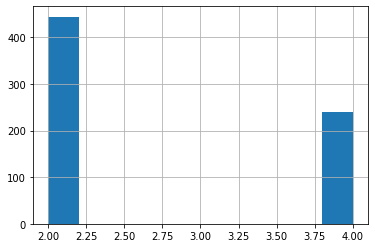

In [ ]:
y = X['Class']
y.hist()

In [ ]:
X.drop(['Id', 'Class'], axis=1, inplace=True)

In [ ]:
X.head()

,ClumpThickness,UniformityOfCellSize,UniformityOfCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormanNucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
from sklearn.preprocessing import scale
data = scale(X)

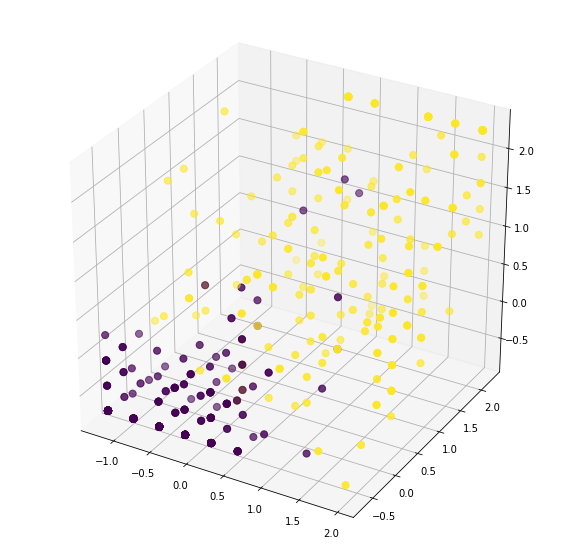

In [ ]:
# выберем три признака из 4-х
x_axis = data[:, 0]  # Sepal Length
y_axis = data[:, 1]  # petal length
z_axis = data[:, 2]  # petal width 
# Построим 3d график по трем признакам

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_axis, y_axis,z_axis, c=y, s=50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


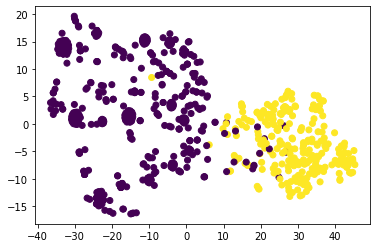

In [ ]:
# Визуализируем 4-мерные данные на плоскость
from sklearn.manifold import TSNE

# Определяем модель и скорость обучения
model = TSNE(learning_rate=30)

# Обучаем модель
transformed = model.fit_transform(data)

# Представляем результат в двумерных координатах

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=y)
plt.show()

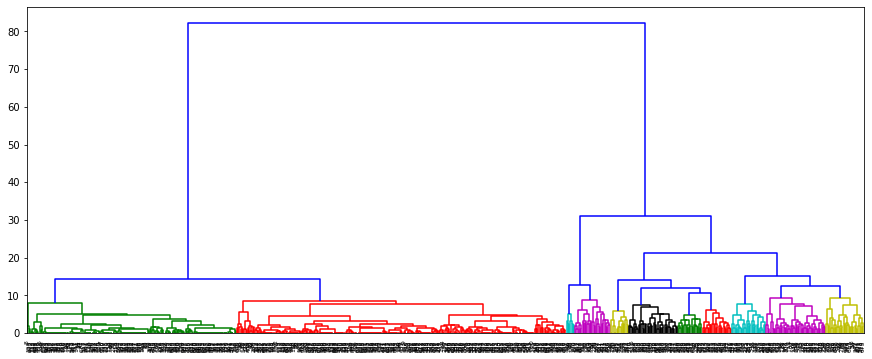

In [ ]:
fig = plt.figure(figsize = (15, 6))
# построим дендрограмму 
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(data,  method='ward')
#метод complete вычисляет расстояние между кластерами по методу варда
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
            leaf_rotation=90,leaf_font_size=6, color_threshold=10)
plt.show()

In [ ]:
# Сформируем 3 кластера и посчитаем метрику качества кластеризации
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=11,  linkage = 'ward')
y_hc = hc.fit_predict(data)
from sklearn import metrics
metrics.silhouette_score(data, y_hc)

0.21489134066375107

In [ ]:
cc = AgglomerativeClustering(n_clusters=11,  linkage = 'complete')
y_cc = cc.fit_predict(data)
metrics.silhouette_score(data, y_cc)

0.439964003892902

In [ ]:
# Предсказание на всем наборе данных
y_hc

array([ 8,  1,  8,  0,  8,  9,  2,  2,  2,  8,  2,  2,  8,  2,  4,  1,  8,
        8,  1,  8,  4,  5,  8,  2,  8,  8,  8,  2,  2,  8,  2,  6,  2,  8,
        2, 10,  8,  4,  0,  1,  6,  0, 10,  2,  0,  2,  8,  0,  7,  8,  0,
        3,  6,  1,  0,  1,  1,  1,  0,  2,  6,  0,  2,  7,  8,  0,  7,  2,
        8,  3,  8,  4,  1,  2,  2,  8,  8,  2,  8,  8,  8,  8,  3,  3,  1,
        9,  8,  2,  2,  8,  8,  2,  2,  2,  8,  8,  3,  9,  0,  8,  8,  1,
        3,  7,  4,  9,  2,  5,  8,  1,  4,  6,  8,  2,  8,  3,  2,  8,  2,
        8,  6,  1,  9,  2,  4,  8,  1,  0,  8,  2,  9,  8,  2,  8,  8,  8,
        8,  8,  8,  1,  2,  2,  1,  2,  0,  3,  2,  1, 10,  8,  2,  4,  2,
        2,  3,  5,  8,  8,  2,  8,  9,  3,  8,  2,  8,  2,  2,  3,  1,  9,
        2, 10,  8,  1,  2,  2,  8,  9,  1,  2,  9,  3,  9,  2,  9,  9,  8,
        2,  8,  8,  5,  8,  2,  8,  5,  6,  2,  8,  2,  3,  0,  2,  2,  8,
        3,  9,  2,  3,  9, 10,  2,  2, 10,  8,  2,  5,  8,  5,  5,  2,  5,
       10,  2,  5,  5,  5

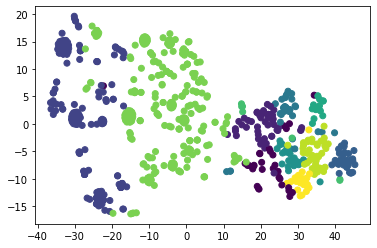

In [ ]:
plt.scatter(x_axis, y_axis, c=y_hc)
plt.show()

In [ ]:
# Импортируем библиотеку для метода к-средних
from sklearn.cluster import KMeans
 

# Описываем модель
model = KMeans(n_clusters=11)

# Проводим моделирование
model.fit(data)

# Предсказание на всем наборе данных
all_predictions = model.predict(data)

# видим, что метки кластеров соответствуют сортам так: setosa=1, versicolor=2,virginica=0
all_predictions

array([ 9,  4,  1,  0,  9,  2,  1,  1,  1,  9,  1,  1,  9,  1,  3,  0,  9,
        9,  4,  9,  3,  0,  1,  1,  4,  1,  9,  1,  1,  1,  1,  8,  1,  1,
        1,  5,  9,  3,  7,  0,  8,  8,  5,  1,  7,  1,  9,  0, 10,  9,  0,
        6,  8,  0,  0, 10,  4,  4,  0,  1,  8,  0,  1, 10,  9,  0, 10,  1,
        9,  6,  1,  3,  4,  1,  1,  9,  1,  1,  1,  9,  9,  1,  6,  6,  4,
        7,  9,  1,  1,  1,  9,  1,  1,  1,  1,  9,  6,  7,  0,  1,  9,  4,
        6, 10,  3,  7,  1,  7,  1,  4,  3,  8,  1,  1,  9,  6,  1,  1,  1,
        9,  8,  4,  7,  1,  3,  1,  4,  1,  9,  1,  2,  1,  1,  9,  9,  1,
        9,  1,  1,  4,  1,  1,  4,  1,  0,  6,  1,  4,  5,  9,  1,  4,  1,
        1,  6,  5,  9,  1, 10,  9,  7,  6,  1,  1,  1,  1,  1,  6,  4,  8,
        1,  5,  9,  4,  1,  1,  9,  7,  4,  1,  7,  6,  7,  1,  5,  2,  9,
        1,  1,  9,  0,  9,  1,  1,  5,  8,  1,  9,  1,  2,  8,  1,  1,  9,
        2,  5,  1,  2,  2,  5,  1,  1,  5,  9,  1,  8,  9,  4,  5,  1,  5,
        5,  1,  8,  4,  5

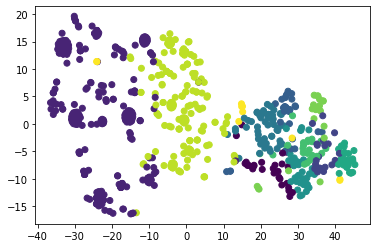

In [ ]:
#Посмотрим на визуализацию кластеров, полученных методос к средних, алгоритмом T-SNE
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

In [ ]:
#вывести значение коэффициента силуэта для оценки качества кластеризации
metrics.silhouette_score(data, all_predictions, metric='euclidean')

0.24818843347327876

In [ ]:
#посмотрим на центры кластеров
d=model.cluster_centers_

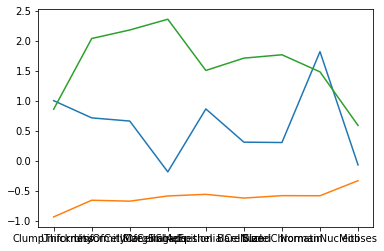

In [ ]:
#нарисуем график средних значений признаков в каждом кластере
x_l=X.columns
plt.plot(x_l,d[0])
plt.plot(x_l,d[1])
plt.plot(x_l,d[2])
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
# Определяем модель DBSCAN
dbscan = DBSCAN(eps=1.5)
# Обучаем
dbscan.fit(data)

DBSCAN(eps=1.5)

In [ ]:
#Смотрим на метки кластеров
dbscan.labels_

array([ 0,  1,  0, -1,  0,  2, -1,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  2,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1,  0, -1, -1, -1, -1, -1, -1,  0,  1,  0,  0,  1, -1,  0, -1,
       -1, -1, -1, -1, -1,  1,  0,  0,  0, -1,  0,  0, -1,  0, -1, -1,  0,
        0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1,  0,  2,  0,  1, -1, -1,  0,  0,  0, -1,  0,  0,  0,
        0, -1, -1, -1,  0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  1,  0, -1, -1,  0, -1, -1,  0,  0,  2,  0,
        0, -1,  2,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  2, -1,
        0, -1,  0,  1,  0,  0,  0,  2,  2,  0, -1, -1,  2,  0,  2, -1,  0,
        0,  0,  0,  2,  0,  0,  0,  2, -1,  0,  0,  0, -1, -1,  0,  0,  0,
       -1,  2,  0, -1, -1, -1,  0,  0,  2,  0,  0, -1,  0,  2,  2,  0,  2,
       -1,  0, -1,  2,  2

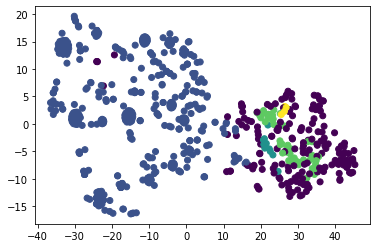

In [ ]:
#Посмотрим на визуализацию кластеров, полученных методом dbscan
plt.scatter(x_axis, y_axis, c=dbscan.labels_)
plt.show()